In [ ]:
from math import exp, sqrt, sin, cos
import matplotlib.pyplot as plt

# Решить задачу Коши для ОДУ первого порядка на указанном отрезке с заданным шагом $h$

## Дано:

In [ ]:
f = lambda x,y: -2*x*y + x*exp(x**2)
y_x = lambda x: (exp(x**2) - exp(-x**2)) / 4
# y_x = lambda x: (exp(x) * x**2) / 2
l, r = 0, 1
h = 0.1
y0 = 0
x = [l]
for i in range(int((r-l)/h)): x.append(x[-1]+h)

## Метод Эйлера

In [ ]:
def Euler(x, h, y0, f):
    y = [y0]
    for i in range(len(x)-1):
        y.append(y[i] + h * f(x[i], y[i]))
    return y

## Модифицированный метод Эйлера

In [ ]:
def Modif_Euler(x, h, y0, f):
    y = [y0]
    for i in range(len(x)-1):
        y.append(y[i] + h * f(x[i]+h/2, y[i]+h/2*f(x[i], y[i])))
    return y

## Классический метод Рунге-Кутты 4-го порядка

In [ ]:
def RungeKutta(x, h, y0, f):
    y = [y0]
    for i in range(len(x)-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + h*k1/2)
        k3 = f(x[i] + h/2, y[i] + h*k2/2)
        k4 = f(x[i] + h, y[i] + h*k3)
        y.append(y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4))
    return y

## Метод Адамса

In [ ]:
def Adams(x, h, y0, f):
    y = RungeKutta(x[:4], h, y0, f)
    k = (55, -59, 37, -9)
    for i in range(4, len(x)):
        y.append(y[-1] + h/24*sum([k[j-1] * f(x[i-j], y[-j]) for j in range(1, 5)]))
    return y

## Сравнение

Среднеквадратические отклонения:
метода Эйлера = 0.0272266594453816
модифицированного метода Эйлера = 0.0003419344800713541
метода Рунге-Кутты = 5.638856477845183e-06
метода Адамса = 0.00030966725525839674


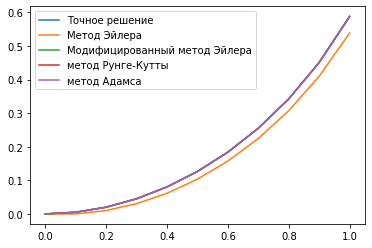

In [ ]:
good_y = [y_x(xi) for xi in x]
eul_y = Euler(x, h, y0, f)
modeul_y = Modif_Euler(x, h, y0, f)
rk_y = RungeKutta(x, h, y0, f)
adam_y = Adams(x, h, y0, f)

plt.plot(x, good_y, label='Точное решение')
plt.plot(x, eul_y, label='Метод Эйлера')
plt.plot(x, modeul_y, label='Модифицированный метод Эйлера')
plt.plot(x, rk_y, label='метод Рунге-Кутты')
plt.plot(x, adam_y, label='метод Адамса')
plt.legend()
def SD(y1, y2): return sqrt(sum([(y1[i]-y2[i])**2 for i in range(len(y1))])/len(y1))
print('Среднеквадратические отклонения:')
print('метода Эйлера =', SD(good_y, eul_y))
print('модифицированного метода Эйлера =', SD(good_y, modeul_y))
print('метода Рунге-Кутты =', SD(good_y, rk_y))
print('метода Адамса =', SD(good_y, adam_y))

# Решить задачу Коши для ОДУ второго порядка на указанном отрезке с заданным шагом $h$

## Дано:

In [ ]:
f = lambda x,y,z: 2*cos(x) - y
f1 = lambda x,y,z: z
y_x = lambda x: x*sin(x) + sin(x) + cos(x)
# y_x = lambda x: sin(x) + cos(x)
l, r = 0, 10
h = 0.1
y0, z0 = 1, 1
x = [l]
for i in range(int((r-l)/h)): x.append(x[-1]+h)

## Метод Эйлера

In [ ]:
def Euler(x, h, y0, z0, f, f1):
    y = [y0]
    zi = z0
    for i in range(len(x)-1):
        y.append(y[i] + h * f1(x[i], y[i], zi))
        zi += h * f(x[i], y[i], zi)
    return y

## Модифицированный метод Эйлера

In [ ]:
def Modif_Euler(x, h, y0, z0, f, f1):
    y = [y0]
    zi = z0
    for i in range(len(x)-1):
        y.append(y[i] + h * f1(x[i]+h/2, y[i]+h/2*f1(x[i], y[i], zi), zi+h/2*f(x[i], y[i], zi)))
        zi += h * f(x[i]+h/2, y[i]+h/2*f(x[i], y[i], zi), zi+h/2*f(x[i], y[i], zi))
    return y

## Классический метод Рунге-Кутты 4-го порядка

In [ ]:
def RungeKutta(x, h, y0, z0, f, f1):
    y, z = [y0], [z0]
    for i in range(len(x)-1):
        k1 = f(x[i], y[i], z[i])
        m1 = f1(x[i], y[i], z[i])
        k2 = f(x[i]+h/2, y[i]+h*m1/2, z[i]+h*k1/2)
        m2 = f1(x[i]+h/2, y[i]+h*m1/2, z[i]+h*k1/2)
        k3 = f(x[i]+h/2, y[i]+h*m2/2, z[i]+h*k2/2)
        m3 = f1(x[i]+h/2, y[i]+h*m2/2, z[i]+h*k2/2)
        k4 = f(x[i]+h, y[i]+h*m3, z[i]+k3)
        m4 = f1(x[i]+h, y[i]+h*m3, z[i]+k3)
        y.append(y[i] + h/6 * (m1 + 2*m2 + 2*m3 + m4))
        z.append(z[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4))
    return y, z

## Метод Адамса

In [ ]:
def Adams(x, h, y0, z0, f, f1):
    y, z = RungeKutta(x[:4], h, y0, z0, f, f1)
    k = (55, -59, 37, -9)
    for i in range(4, len(x)):
        z.append(z[-1] + h/24*sum([k[j-1] * f(x[i-j], y[-j], z[-j]) for j in range(1, 5)]))
        y.append(y[-1] + h/24*sum([k[j-1] * f1(x[i-j], y[-j], z[-j]) for j in range(1, 5)]))
    return y

## Сравнение

Среднеквадратические отклонения:
метода Эйлера = 1.127986772418572
модифицированного метода Эйлера = 0.691594040735035
метода Рунге-Кутты = 1.153482964541027
метода Адамса = 0.8086524830488143


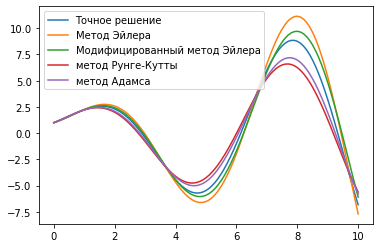

In [ ]:
good_y = [y_x(xi) for xi in x]
eul_y = Euler(x, h, y0, z0, f, f1)
modeul_y = Modif_Euler(x, h, y0, z0, f, f1)
rk_y = RungeKutta(x, h, y0, z0, f, f1)[0]
adam_y = Adams(x, h, y0, z0, f, f1)

plt.plot(x, good_y, label='Точное решение')
plt.plot(x, eul_y, label='Метод Эйлера')
plt.plot(x, modeul_y, label='Модифицированный метод Эйлера')
plt.plot(x, rk_y, label='метод Рунге-Кутты')
plt.plot(x, adam_y, label='метод Адамса')
plt.legend()
def SD(y1, y2): return sqrt(sum([(y1[i]-y2[i])**2 for i in range(len(y1))])/len(y1))
print('Среднеквадратические отклонения:')
print('метода Эйлера =', SD(good_y, eul_y))
print('модифицированного метода Эйлера =', SD(good_y, modeul_y))
print('метода Рунге-Кутты =', SD(good_y, rk_y))
print('метода Адамса =', SD(good_y, adam_y))